In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_5310 = pd.read_csv("../Data/5310-22230(Jan2016-Sep2022).csv")


In [3]:
df_5310.head()

,Charter,Period,AccountName,Value
0,,,,
1,22230,9/1/2022,NaN,22361.0000000000000000
2,22230,9/1/2022,NaN,598797.0000000000000000
3,22230,9/1/2022,NaN,111845.0000000000000000
4,22230,9/1/2022,NaN,327770.0000000000000000


In [4]:
df_5310.isna().sum()

Charter            0
Period             0
AccountName    26199
Value             69
dtype: int64

In [5]:
df_5310.describe()

,Charter,Period,AccountName,Value
count,31673,31673,5474,31604
unique,2,82,494,12973
top,22230,5/1/2016,CAPAUGLonAFSS,2.0000000000000000
freq,31672,464,12,4841


In [6]:
df_5310.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31673 entries, 0 to 31672
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Charter      31673 non-null  object
 1   Period       31673 non-null  object
 2   AccountName  5474 non-null   object
 3   Value        31604 non-null  object
dtypes: object(4)
memory usage: 989.9+ KB


The dataset has 494 unique account value out of 31673 observations. 
What about those account that is not null?

In [7]:
account = df_5310.loc[df_5310['AccountName'].notna()]

account.head()

,Charter,Period,AccountName,Value
0,,,,
26200,22230,12/1/2016,LoanIntInc,5251.0000000000000000
26201,22230,12/1/2016,wISTotIntInc,241474.0000000000000000
26202,22230,12/1/2016,FeeIncome,59377.0000000000000000
26203,22230,12/1/2016,wISNetIntInc,195416.0000000000000000


In [8]:
account.describe()

,Charter,Period,AccountName,Value
count,5474,5474,5474,5474
unique,2,13,494,2416
top,22230,5/1/2016,CAPAUGLonAFSS,1.0000000000000000
freq,5473,464,12,195


In [9]:
account.isna().sum()

Charter        0
Period         0
AccountName    0
Value          0
dtype: int64

AccountName that is not null have all of the values. There are 13 unique period over 6 years indicating 2 reports per year.

## Questions:
* what is the distribution of all values? displot
* what is the distribution of not null account value? distplot
* Group by all of the account, what's the rank? bar plot
* what is the distribution in different period? Any linear correlations? lmplot

## Clean data 
1. remove all strings in 'Value' column.
2. convert remaining data to float.

In [10]:
df = df_5310.copy()
df = df.loc[df['Value'].notna()]


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31604 entries, 0 to 31672
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Charter      31604 non-null  object
 1   Period       31604 non-null  object
 2   AccountName  5474 non-null   object
 3   Value        31604 non-null  object
dtypes: object(4)
memory usage: 1.2+ MB


In [12]:
df.drop([0],inplace=True)
account.drop([0],inplace=True)

/var/folders/0z/5dyhp7xx5g700b6sqbzkl_fw0000gn/T/ipykernel_94350/3785840234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  account.drop([0],inplace=True)


In [13]:
#df = df.loc[df['Value']!='Agency CMBS - Var Rate']

In [14]:
remove_list = []
def isfloat(x):
    
    try:
        float(x)
        
    except ValueError:
        
        return x
for x in df['Value']:
    temp = isfloat(x)
    if temp is not None:

        remove_list.append(temp)


In [15]:
#print(remove_list)
print(len(remove_list))
print(df.shape, account.shape)

1285
(31603, 4) (5473, 4)


In [16]:
df = df.loc[~df['Value'].isin(remove_list)]
account = account.loc[~account['Value'].isin(remove_list)]

In [17]:
print(account.shape)

(5281, 4)


In [18]:
df.shape

(30318, 4)

In [19]:
df['Value']=df['Value'].astype(float)
account['Value']=account['Value'].astype(float)

/var/folders/0z/5dyhp7xx5g700b6sqbzkl_fw0000gn/T/ipykernel_94350/2759840557.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  account['Value']=account['Value'].astype(float)


In [20]:
account.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5281 entries, 26200 to 31672
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Charter      5281 non-null   object 
 1   Period       5281 non-null   object 
 2   AccountName  5281 non-null   object 
 3   Value        5281 non-null   float64
dtypes: float64(1), object(3)
memory usage: 206.3+ KB


In [21]:
df.loc[df['Value']=='']

,Charter,Period,AccountName,Value


In [22]:
account.describe()

,Value
count,5.281000e+03
mean,3.680109e+07
std,8.133248e+07
min,-1.251980e+06
25%,2.582000e+03
50%,5.000000e+06
75%,2.228951e+07
max,8.924256e+08


### Check distributions

In [23]:
def distributions(df1,df2):
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,8))
    sns.distplot(df1["Value"], ax=ax1, label='General_overall')
    
    sns.distplot(df2["Value"], ax=ax2,color='red',label='Account is not null')
    fig.legend()
    plt.tight_layout()

/var/folders/0z/5dyhp7xx5g700b6sqbzkl_fw0000gn/T/ipykernel_94350/1207875876.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1["Value"], ax=ax1, label='General_overall')
/var/folders/0z/5dyhp7xx5g700b6sqbzkl_fw0000gn/T/ipykernel_94350/1207875876.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.di

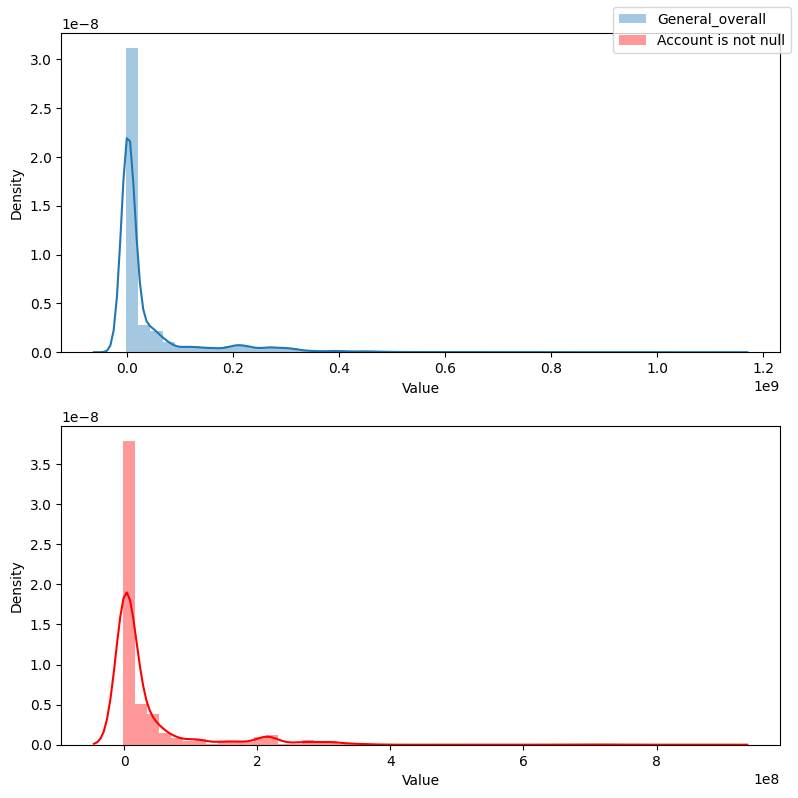

In [24]:
distributions(df,account)

It shows the similar distributions for account null and not null.

In [25]:
new_account = account.groupby(by = ['AccountName'])['Value'].agg(['sum','mean']).reset_index()
new_account.sort_values(by='sum', ascending=False,inplace=True)

In [26]:
new_account.iloc[:10]

,AccountName,sum,mean
259,PSCPESAmt,8.105747e+09,6.754789e+08
261,PSFTSetAmt,7.442993e+09,6.202494e+08
425,wC2TotBSItems,3.858399e+09,3.215333e+08
475,wSFCTotalLiabShrsCap,3.858399e+09,3.215333e+08
473,wSFCTotalAssets,3.858399e+09,3.215333e+08
212,MISC1,3.813969e+09,3.178307e+08
217,MISC1a,3.714567e+09,3.095473e+08
472,wReMattotShr,3.398001e+09,2.831667e+08
290,TotalShares,3.398001e+09,2.831667e+08
464,wL2TotalShares,3.398001e+09,2.831667e+08


In [44]:
from collections import defaultdict
search = [10,30, 50, 80,90,99] # search how many accounts contribute to that much percentage
search_res = defaultdict()
t = 0
for i in search:
    for x in range(t,len(df)):
#calculate percentage of top x accounts
        p = 100*new_account.iloc[:x]['sum'].sum()/account['Value'].sum()

        if p > i:
           
            search_res[str(i)+' percent'] = x
            t = x
            break
search_res['total Account'] = len(df)
print(search_res)



defaultdict(None, {'10 percent': 4, '30 percent': 15, '50 percent': 29, '80 percent': 69, '90 percent': 106, '99 percent': 224, 'total Account': 30318})


In [28]:
print("top 30 accounts contribute to ", round(p,2) ,"percentage")

top 30 accounts contribute to  51.58 percentage


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

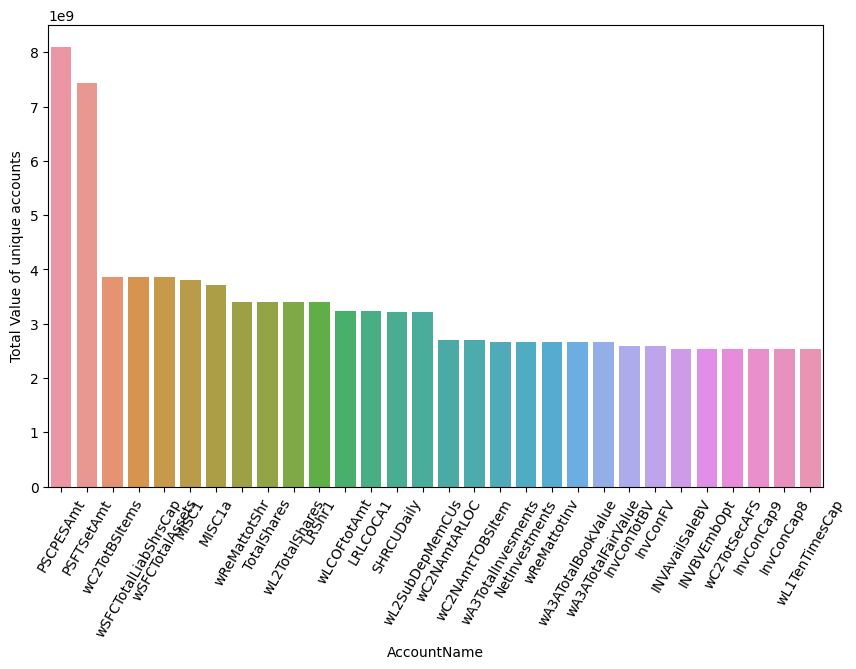

In [29]:
plt.figure(figsize=(10,6))
bar = sns.barplot(x='AccountName',y='sum',data= new_account.iloc[:30])
bar.set_xticklabels(bar.get_xticklabels(),rotation=60)
plt.ylabel('Total Value of unique accounts')
plt.tight_layout

In [ ]:
# account total value percentage chart


In [30]:
new_account2 = account.groupby(by = ['AccountName'])['Value'].mean().rename("total_value").reset_index()
new_account2.sort_values(by='total_value', ascending=False,inplace=True)

In [31]:
new_account2.head()

,AccountName,total_value
259,PSCPESAmt,6.754789e+08
261,PSFTSetAmt,6.202494e+08
475,wSFCTotalLiabShrsCap,3.215333e+08
473,wSFCTotalAssets,3.215333e+08
425,wC2TotBSItems,3.215333e+08


### General period vs value
Explore period vs value to see the trend in the time period

In [32]:
df_time = df.groupby('Period')['Value'].agg(['sum','mean']).reset_index()


In [33]:
df_time.tail(10)

,Period,sum,mean
71,8/1/2020,2.257401e+10,6.270559e+07
72,8/1/2021,1.859242e+10,5.107808e+07
73,8/1/2022,1.531941e+10,4.197098e+07
74,9/1/2016,1.718446e+10,3.853019e+07
75,9/1/2017,1.242487e+10,3.331065e+07
76,9/1/2018,1.224732e+10,3.310087e+07
77,9/1/2019,1.351923e+10,3.786900e+07
78,9/1/2020,2.132853e+10,5.875628e+07
79,9/1/2021,1.838482e+10,5.050774e+07
80,9/1/2022,1.661125e+10,4.576102e+07


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

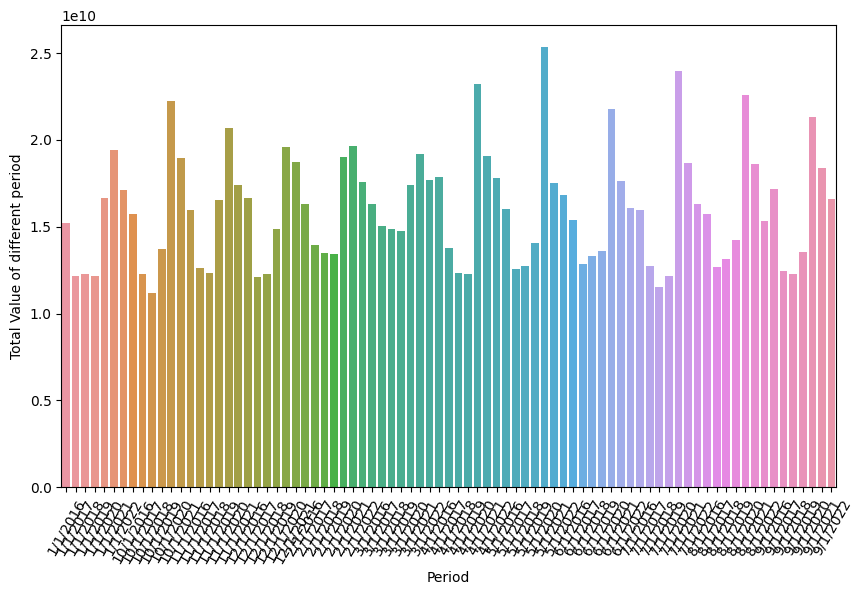

In [34]:
plt.figure(figsize=(10,6))
bar = sns.barplot(x='Period',y='sum',data= df_time)
bar.set_xticklabels(bar.get_xticklabels(),rotation=60)
plt.ylabel('Total Value of different period')
plt.tight_layout

/var/folders/0z/5dyhp7xx5g700b6sqbzkl_fw0000gn/T/ipykernel_94350/2157459617.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar.set_xticklabels(bar.get_xticklabels(),rotation=60)


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

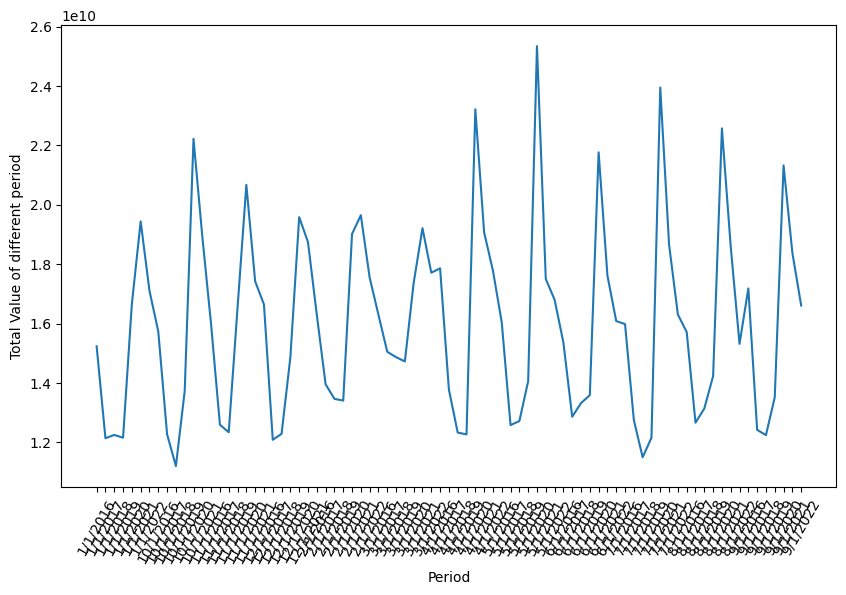

In [35]:
plt.figure(figsize=(10,6))
bar = sns.lineplot(x='Period',y='sum',data= df_time)
bar.set_xticklabels(bar.get_xticklabels(),rotation=60)
plt.ylabel('Total Value of different period')
plt.tight_layout

The plot shows a pattern of the total values throught the period, 2016-2022 every month starts with low then increases to the peak 2018, decreases with year increases

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

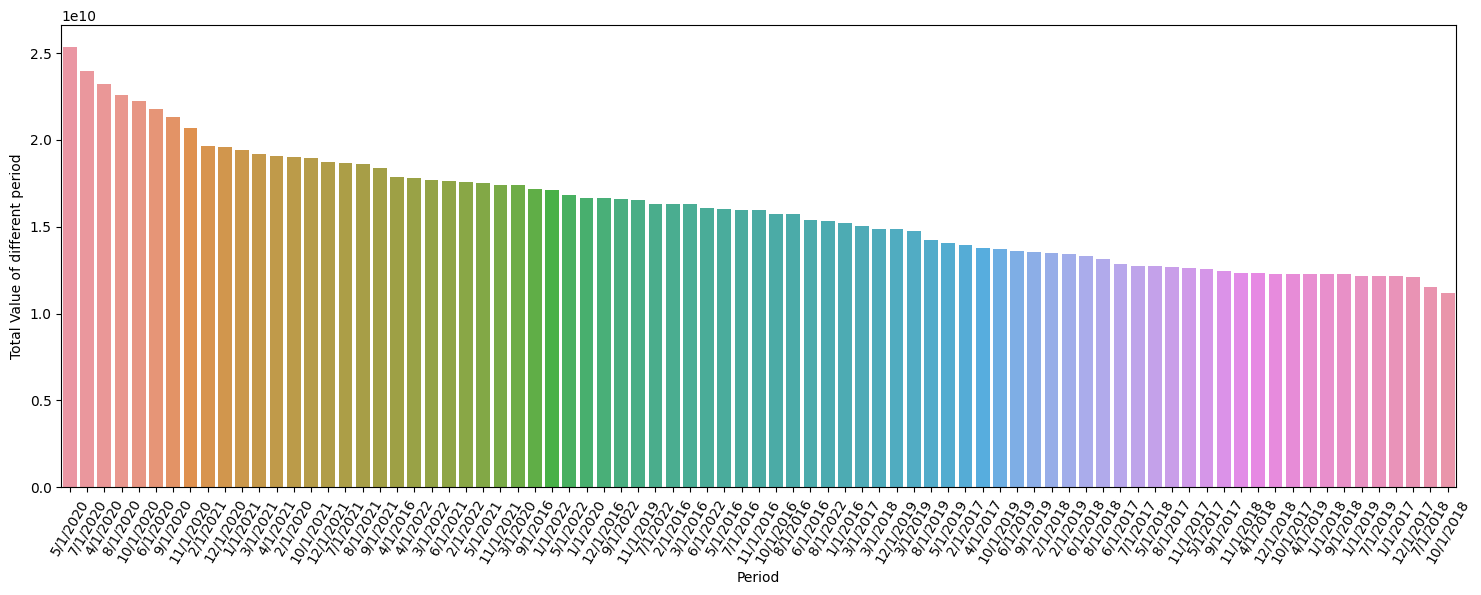

In [36]:
df_time2 = df_time.sort_values(by='sum', ascending=False)
plt.figure(figsize=(18,6))
bar = sns.barplot(x='Period',y='sum',data= df_time2)
bar.set_xticklabels(bar.get_xticklabels(),rotation=60)
plt.ylabel('Total Value of different period')
plt.tight_layout

/var/folders/0z/5dyhp7xx5g700b6sqbzkl_fw0000gn/T/ipykernel_94350/796087528.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar.set_xticklabels(bar.get_xticklabels(),rotation=60)


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

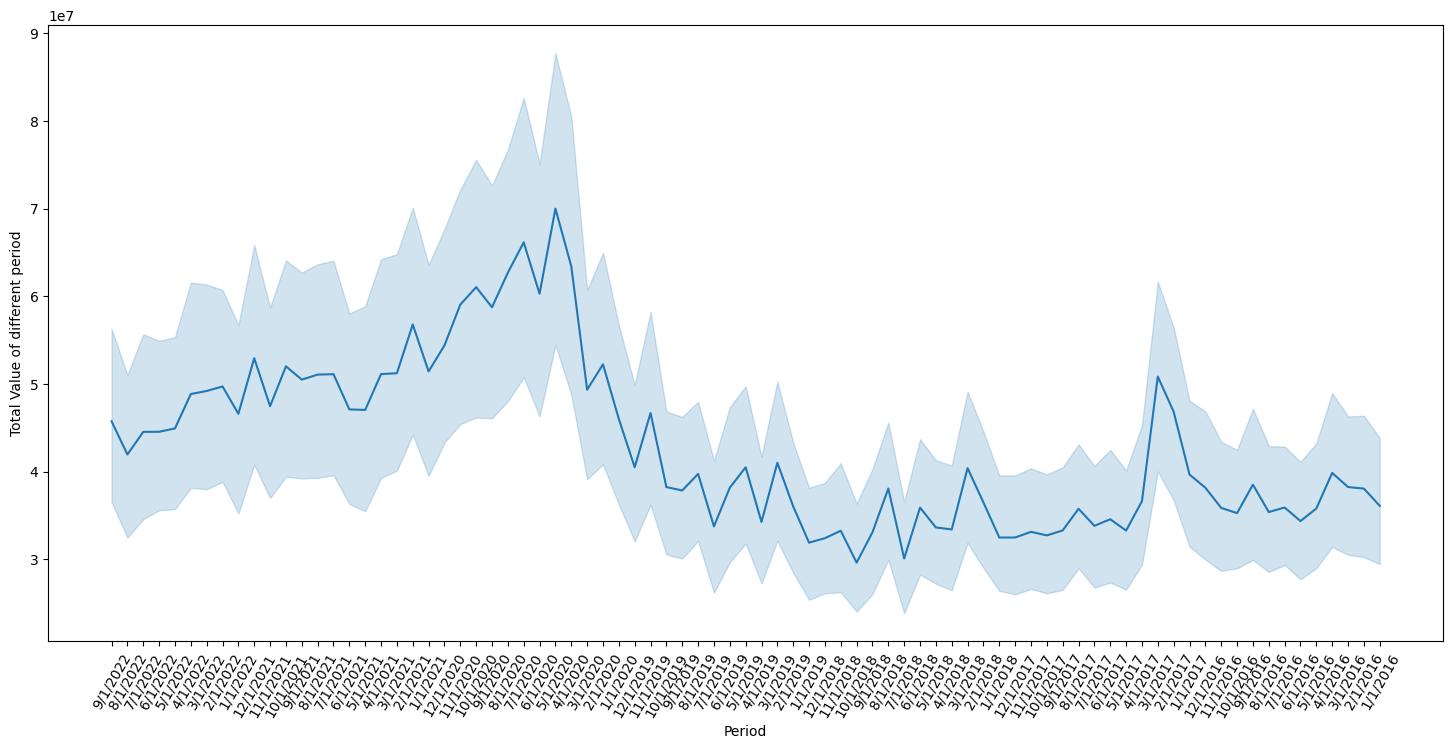

In [37]:
#df.sort_values(by='Period', ascending=True, inplace=True)
plt.figure(figsize=(18,8))
bar = sns.lineplot(x='Period',y='Value',data= df)
bar.set_xticklabels(bar.get_xticklabels(),rotation=60)
plt.ylabel('Total Value of different period')
plt.tight_layout

From 2016-2022, it was stable from 2016-2017, 2017, 2 has a huge bump increase. from 2019 1/1 to 2020/6/1 it continually increases. Then it decreases steadily from 2021/1/1

## Convert period to datetime, explore the timeseries trend

In [48]:
import datetime
df['Period'] = pd.to_datetime(df['Period'])

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30318 entries, 1 to 31672
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Charter      30318 non-null  object        
 1   Period       30318 non-null  datetime64[ns]
 2   AccountName  5281 non-null   object        
 3   Value        30318 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 1.2+ MB


/var/folders/0z/5dyhp7xx5g700b6sqbzkl_fw0000gn/T/ipykernel_94350/2939504845.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar.set_xticklabels(bar.get_xticklabels(),rotation=60)


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

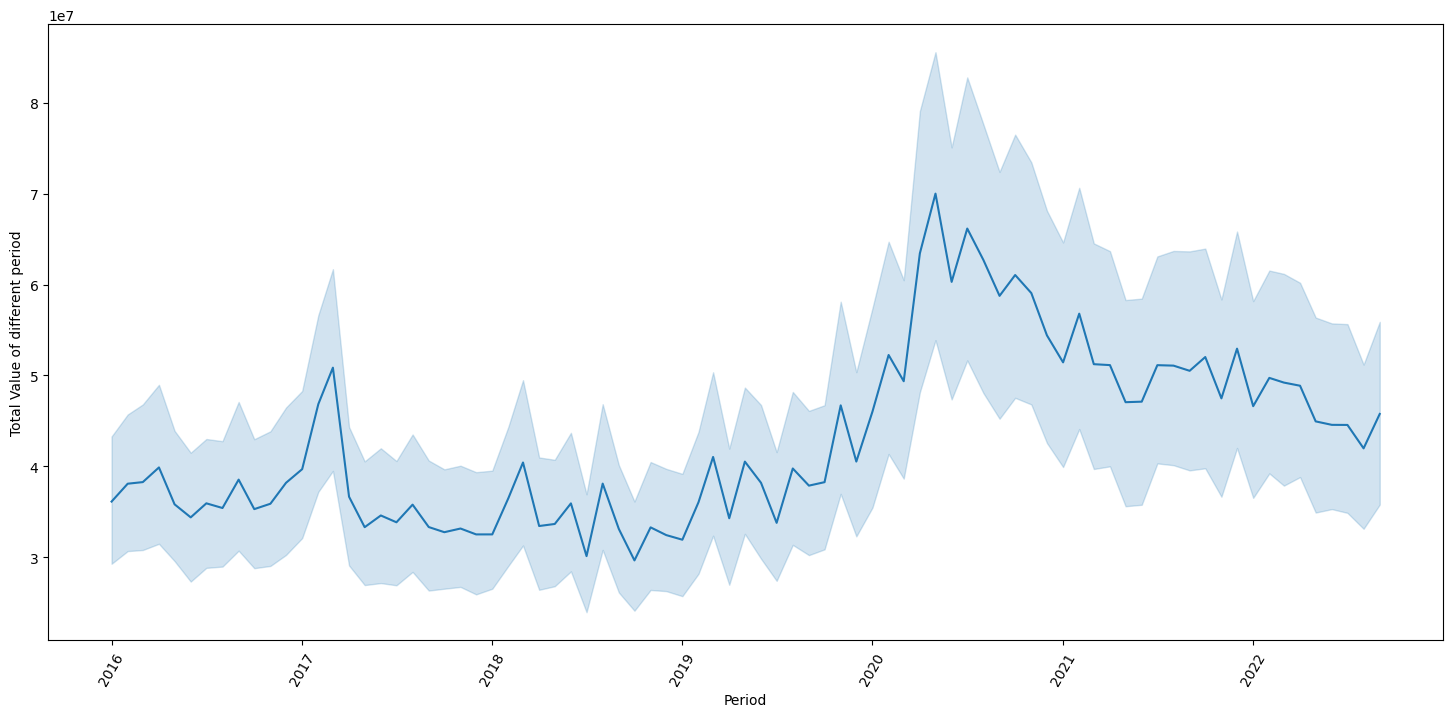

In [50]:
plt.figure(figsize=(18,8))
bar = sns.lineplot(x='Period',y='Value',data= df)
bar.set_xticklabels(bar.get_xticklabels(),rotation=60)
plt.ylabel('Total Value of different period')
plt.tight_layout